# Hands-on Activity 4.2 Object Detection on Custom Dataset

**Hernandez, Eujean Marie** <br>
**CPE32S8**

Installing Miniconda and TensorFlow 1.5.0 with Python 3.5

In [1]:
!python --version

Python 3.10.12


In [2]:
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.2.12-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX


PREFIX=/usr/local
installing: python-3.5.2-0 ...
installing: conda-env-2.6.0-0 ...
installing: openssl-1.0.2j-0 ...
installing: pycosat-0.6.1-py35_1 ...
installing: readline-6.2-2 ...
installing: requests-2.11.1-py35_0 ...
installing: ruamel_yaml-0.11.14-py35_0 ...
installing: sqlite-3.13.0-0 ...
installing: tk-8.5.18-0 ...
installing: xz-5.2.2-0 ...
installing: yaml-0.1.6-0 ...
installing: zlib-1.2.8-3 ...
installing: conda-4.2.12-py35_0 ...
installing: pycrypto-2.6.1-py35_4 ...
installing: pip-8.1.2-py35_0 ...
installing: wheel-0.29.0-py35_0 ...
installing: setuptools-27.2.0-py35_0 ...
creating default environment...
using -f (force) option
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /usr/lo

--2024-04-01 05:20:09--  https://repo.continuum.io/miniconda/Miniconda3-4.2.12-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.176.84, 104.18.177.84, 2606:4700::6812:b154, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.176.84|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.2.12-Linux-x86_64.sh [following]
--2024-04-01 05:20:09--  https://repo.anaconda.com/miniconda/Miniconda3-4.2.12-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33905474 (32M) [application/x-sh]
Saving to: ‘Miniconda3-4.2.12-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 48.2M 1s
    50K .......... .......... .......... .......... ..........

In [3]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.5/site-packages"))

In [4]:
!python --version

Python 3.5.2 :: Continuum Analytics, Inc.


In [5]:
!curl -fsSL https://bootstrap.pypa.io/pip/3.5/get-pip.py | python3.5


     |████████████████████████████████| 1.5 MB 1.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 8.1.2
    Uninstalling pip-8.1.2:
      Successfully uninstalled pip-8.1.2


In [6]:
!pip install tensorflow==1.5.0

     |████████████████████████████████| 44.4 MB 1.5 MB/s 
     |████████████████████████████████| 162 kB 50.7 MB/s 
     |████████████████████████████████| 3.0 MB 35.9 MB/s 
     |████████████████████████████████| 19.9 MB 1.2 MB/s 
     |████████████████████████████████| 132 kB 48.3 MB/s 
     |████████████████████████████████| 298 kB 52.2 MB/s 
     |████████████████████████████████| 889 kB 48.1 MB/s 
     |████████████████████████████████| 88 kB 8.2 MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-py3-none-any.whl size=111289 sha256=3713fa6acf88e4b30fa2326b6ae7d4a75e2238fe28d763bdd7727d93f9f852a4
  Stored in directory: /root/.cache/pip/wheels/5c/93/0e/45057f13b26ba880ba315b4b580d52ca76151fa88aa5db6db8
Successfully built html5lib


NOTE: For the most up to date version of this notebook, please be sure to copy from this link:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ByRi9d6_Yzu0nrEKArmLMLuMaZjYfygO#scrollTo=WgHANbxqWJPa)



## **Training YOLOv3 object detection on a custom dataset**

💡 Recommendation: [Open this blog post](https://blog.roboflow.ai/training-a-yolov3-object-detection-model-with-a-custom-dataset/) to continue.

### **Overview**

This notebook walks through how to train a YOLOv3 object detection model on your own dataset using Roboflow and Colab.

In this specific example, we'll training an object detection model to recognize chess pieces in images. **To adapt this example to your own dataset, you only need to change one line of code in this notebook.**

![Chess Example](https://i.imgur.com/nkjobw1.png)

### **Our Data**

Our dataset of 289 chess images (and 2894 annotations!) is hosted publicly on Roboflow [here](https://public.roboflow.ai/object-detection/chess-full).

### **Our Model**

We'll be training a YOLOv3 (You Only Look Once) model. This specific model is a one-shot learner, meaning each image only passes through the network once to make a prediction, which allows the architecture to be very performant, viewing up to 60 frames per second in predicting against video feeds.

The GitHub repo containing the majority of the code we'll use is available [here](https://github.com/roboflow-ai/keras-yolo3.git).

### **Training**

Google Colab provides free GPU resources. Click "Runtime" → "Change runtime type" → Hardware Accelerator dropdown to "GPU."

Colab does have memory limitations, and notebooks must be open in your browser to run. Sessions automatically clear themselves after 24 hours.

### **Inference**

We'll leverage the `python_video.py` script to produce predictions. Arguments are specified below.

It's recommended that you expand the left-hand panel to view this notebook's Table of contents, Code Snippets, and Files.

![Expand Colab](https://i.imgur.com/r8kWzIv.png "Click here")

Then, click "Files." You'll see files appear here as we work through the notebook.


### **About**

[Roboflow](https://roboflow.ai) makes managing, preprocessing, augmenting, and versioning datasets for computer vision seamless.

Developers reduce 50% of their boilerplate code when using Roboflow's workflow, save training time, and increase model reproducibility.

#### ![Roboflow Workmark](https://i.imgur.com/WHFqYSJ.png)







## Setup our environment

First, we'll install the version of Keras our YOLOv3 implementation calls for and verify it installs corrects.

In [1]:
# Get our kernel running
print("Hello, Roboflow")

Hello, Roboflow


In [8]:
# Our YOLOv3 implementation calls for this Keras version
!pip install keras==2.2.4

     |████████████████████████████████| 312 kB 1.6 MB/s 
     |████████████████████████████████| 269 kB 29.5 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 50 kB 8.4 MB/s 
     |████████████████████████████████| 2.8 MB 47.2 MB/s 
     |████████████████████████████████| 26.0 MB 53.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp35-cp35m-linux_x86_64.whl size=505956 sha256=1d15548ad9d1d29efff829f41ca364c46ba2a99f82f553277d824c07efcc45d3
  Stored in directory: /root/.cache/pip/wheels/57/d0/2c/e2003abb5bc1a94c2e8a6fe1c03b8055d074e34c13672e7eb7
Successfully built pyyaml


In [2]:
# use TF 1.x
# %tensorflow_version 1.x
!pip show tensorflow

Name: tensorflow
Version: 1.5.0
Summary: TensorFlow helps the tensors flow
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.5/site-packages
Requires: numpy, protobuf, six, wheel, absl-py, tensorflow-tensorboard
Required-by: 


In [3]:
# Verify our version is correct
!python -c 'import keras; print(keras.__version__)'

Using TensorFlow backend.
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

In [4]:
# Next, we'll grab all the code from our repository of interest
!git clone https://github.com/roboflow-ai/keras-yolo3

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 169, done.
remote: Total 169 (delta 0), reused 0 (delta 0), pack-reused 169
Receiving objects: 100% (169/169), 172.74 KiB | 2.88 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [5]:
# here's what we cloned (also, see "Files" in the left-hand Colab pane)
%ls

keras-yolo3/  Miniconda3-4.2.12-Linux-x86_64.sh*  sample_data/


In [6]:
# change directory to the repo we cloned
%cd keras-yolo3/

/content/keras-yolo3


In [7]:
# show the contents of our repo
%ls

coco_annotation.py  font/      model_data/          train.py           yolo3/      yolov3-tiny.cfg
convert.py          kmeans.py  README.md            Tutorial.ipynb     yolo.py     yolo_video.py
darknet53.cfg       LICENSE    train_bottleneck.py  voc_annotation.py  yolov3.cfg


## Get our training data from Roboflow

Next, we need to add our data from Roboflow into our environment.

Our dataset, with annotations, is [here](https://public.roboflow.ai/object-detection/chess-full).

Here's how to bring those images from Roboflow to Colab:

1. Visit this [link](https://public.roboflow.ai/object-detection/chess-full).
2. Click the "416x416auto-orient" under Downloads.
3. On the dataset detail page, select "Download" in the upper right-hand corner.
4. If you are not signed in, you will be prompted to create a free account (sign in with GitHub or email), and redirected to the dataset page to Download.
5. On the download popup, select the YOLOv3 Keras option **and** the "Show download `code`".
6. Copy the code snippet Roboflow generates for you, and paste it in the next cell.

This is the download menu you want (from step 5):
#### ![Download Menu](https://i.imgur.com/KW2PyQO.png)

The top code snippet is the one you want to copy (from step 6) and paste in the next notebook cell:
### ![Code Snippet](https://i.imgur.com/qzJckWR.png)





**This cell below is only one you need to change to have YOLOv3 train on your own Roboflow dataset.**

In [8]:
# Paste Roboflow code from snippet here from above to here! eg !curl -L https://app.roboflow.ai/ds/eOSXbt7KWu?key=YOURKEY | jar -x
!curl -L https://universe.roboflow.com/ds/JlWQ9Lbfqp?key=DvjRl0mgen > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

#https://universe.roboflow.com/ds/JlWQ9Lbfqp?key=DvjRl0mgen

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   906  100   906    0     0   4313      0 --:--:-- --:--:-- --:--:--  4334
100 39.6M  100 39.6M    0     0  26.8M      0  0:00:01  0:00:01 --:--:-- 38.3M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: train/
 extracting: train/Hat-1-_jpg.rf.0a21b02f9d8c517d7899d0d453d55025.jpg  
 extracting: train/Hat-1-_jpg.rf.181ae0f27430239f45452a503b1b03be.jpg  
 extracting: train/Hat-1-_jpg.rf.4552496b94a7e0e614d77da9dfd3bccd.jpg  
 extracting: train/Hat-1-_jpg.rf.4e2e5d3da5c7a6f120e119aaf4558359.jpg  
 extracting: train/Hat-1-_jpg.rf.6f0e29590ab1d6d3703fc57415b62ca7.jpg  
 extracting: train/Hat-1-_jpg.rf.6fbf47d60dc88ce7a16eda5e827ad467.jpg  
 extracting: train/Hat-1-_jpg.rf.8effd4a61215646ec800c0e18eb45e7b.jpg  
 extracting: train/Hat-1-_jpg.rf.9bc2ccb364a4c863e8b425512788

In [9]:
%ls

coco_annotation.py  LICENSE              train/               voc_annotation.py  yolo_video.py
convert.py          model_data/          train_bottleneck.py  yolo3/
darknet53.cfg       README.dataset.txt   train.py             yolo.py
font/               README.md            Tutorial.ipynb       yolov3.cfg
kmeans.py           README.roboflow.txt  valid/               yolov3-tiny.cfg


In [10]:
# change directory into our export folder from Roboflow
%cd train

/content/keras-yolo3/train


In [11]:
# show what came with the Roboflow export
%ls

_annotations.txt
_classes.txt
eye-glasses-10-_png_jpg.rf.0374ba4b59f32a67c5e3c131fa1278d6.jpg
eye-glasses-10-_png_jpg.rf.5cec72f4930d54396f7c6504d68bafea.jpg
eye-glasses-10-_png_jpg.rf.994602f2dd9ed581b1c892e17dd1b813.jpg
eye-glasses-10-_png_jpg.rf.a6457a2eb3d2a0293e1731e51dcf6af0.jpg
eye-glasses-10-_png_jpg.rf.ccb634cf2d762d519d15a0c5117f73bb.jpg
eye-glasses-10-_png_jpg.rf.e01e1330518af8bd5d22f4cc92d2e66e.jpg
eye-glasses-10-_png_jpg.rf.ef52d3345252bcab2501139ea69501c6.jpg
eye-glasses-10-_png_jpg.rf.f460812acd4d52b8ddef9804f84b6349.jpg
eye-glasses-10-_png_jpg.rf.fd71df4c903961a9790fc9870af9cb63.jpg
eye-glasses-11-_png_jpg.rf.1dcd3ac5c64ad18a8493870e86e335f4.jpg
eye-glasses-11-_png_jpg.rf.29f274e9e746e6428870b4e5ead06efc.jpg
eye-glasses-11-_png_jpg.rf.34172aa03b97aa62a5275d4a400dd84e.jpg
eye-glasses-11-_png_jpg.rf.3fdecc6a3175b085725ed267c00cdd6f.jpg
eye-glasses-11-_png_jpg.rf.757789e5f112ad5276cc065cc7718f36.jpg
eye-glasses-11-_png_jpg.rf.77efbd42a3b0f6097c1fd65dbecd5185.jpg
eye-glasse

In [12]:
# move everything from the Roboflow export to the root of our keras-yolo3 folder
%mv * ../

In [13]:
# change directory back to our
%cd ..

/content/keras-yolo3


In [14]:
# show that all our images, _annotations.txt, and _classes.txt made it to our root directory
%ls

_annotations.txt
_classes.txt
coco_annotation.py
convert.py
darknet53.cfg
eye-glasses-10-_png_jpg.rf.0374ba4b59f32a67c5e3c131fa1278d6.jpg
eye-glasses-10-_png_jpg.rf.5cec72f4930d54396f7c6504d68bafea.jpg
eye-glasses-10-_png_jpg.rf.994602f2dd9ed581b1c892e17dd1b813.jpg
eye-glasses-10-_png_jpg.rf.a6457a2eb3d2a0293e1731e51dcf6af0.jpg
eye-glasses-10-_png_jpg.rf.ccb634cf2d762d519d15a0c5117f73bb.jpg
eye-glasses-10-_png_jpg.rf.e01e1330518af8bd5d22f4cc92d2e66e.jpg
eye-glasses-10-_png_jpg.rf.ef52d3345252bcab2501139ea69501c6.jpg
eye-glasses-10-_png_jpg.rf.f460812acd4d52b8ddef9804f84b6349.jpg
eye-glasses-10-_png_jpg.rf.fd71df4c903961a9790fc9870af9cb63.jpg
eye-glasses-11-_png_jpg.rf.1dcd3ac5c64ad18a8493870e86e335f4.jpg
eye-glasses-11-_png_jpg.rf.29f274e9e746e6428870b4e5ead06efc.jpg
eye-glasses-11-_png_jpg.rf.34172aa03b97aa62a5275d4a400dd84e.jpg
eye-glasses-11-_png_jpg.rf.3fdecc6a3175b085725ed267c00cdd6f.jpg
eye-glasses-11-_png_jpg.rf.757789e5f112ad5276cc065cc7718f36.jpg
eye-glasses-11-_png_jpg.rf.77e

## Set up and train our model

Next, we'll download pre-trained weighs weights from DarkNet, set up our YOLOv3 architecture with those pre-trained weights, and initiate training.


In [15]:
# download our DarkNet weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-04-01 05:24:04--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  33.4MB/s    in 6.7s    

2024-04-01 05:24:11 (35.1 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [16]:
# call a Python script to set up our architecture with downloaded pre-trained weights
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

Below, we'll call a "self-contained" Python script that initiates training our model on our custom dataset.

Pay notable attention to:
- setting the paths for our `annotation_path`, `classes_path`, `class_names`. If you move the Roboflow data location, you'll need to update these.
- `val_split` dictates the size of our training data relative to our taining data
- `lr=1e-3` to set the learning rate of the model. Smaller optimizes more slowly but potentially more precisely.
- `batch_size` for the number of images trained per batch
-  `epoch` inside `model.fit_generator()` sets the number training epochs to increase/decrease training examples (and time)

Consider reading the YOLOv3 paper [here](https://pjreddie.com/media/files/papers/YOLOv3.pdf).

In [17]:
"""
Self-contained Python script to train YOLOv3 on your own dataset
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = '_annotations.txt'  # path to Roboflow data annotations
    log_dir = 'logs/000/'                 # where we're storing our logs
    classes_path = '_classes.txt'         # path to Roboflow class names
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    print("-------------------CLASS NAMES-------------------")
    print(class_names)
    print("-------------------CLASS NAMES-------------------")
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/yolo.h5') # make sure you know what you freeze

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.2 # set the size of the validation set
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 16
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=100,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 16 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=100,
            initial_epoch=50,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.



def get_classes(classes_path):
    '''loads the classes'''

    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

if __name__ == '__main__':
    _main()

-------------------CLASS NAMES-------------------
['Hat', 'glasses', 'goggles', 'helmet', 'vest']
-------------------CLASS NAMES-------------------


Create YOLOv3 model with 9 anchors and 5 classes.


Load weights model_data/yolo.h5.
Freeze the first 249 layers of total 252 layers.


<ipython-input-17-c43e4e32f88c>:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),


Train on 720 samples, val on 180 samples, with batch size 16.
Epoch 1/100
45/45 [==============================] - 97s 2s/step - loss: 5028.6372 - val_loss: 3271.6726
Epoch 2/100
45/45 [==============================] - 68s 2s/step - loss: 2493.4866 - val_loss: 1910.7626
Epoch 3/100
45/45 [==============================] - 66s 1s/step - loss: 1543.0773 - val_loss: 1285.1603
Epoch 4/100
45/45 [==============================] - 63s 1s/step - loss: 1089.2433 - val_loss: 911.1017
Epoch 5/100
45/45 [==============================] - 58s 1s/step - loss: 837.1262 - val_loss: 743.4235
Epoch 6/100
45/45 [==============================] - 62s 1s/step - loss: 648.1279 - val_loss: 590.6852
Epoch 7/100
45/45 [==============================] - 55s 1s/step - loss: 534.6709 - val_loss: 483.1561
Epoch 8/100
45/45 [==============================] - 58s 1s/step - loss: 441.1950 - val_loss: 424.4017
Epoch 9/100
45/45 [==============================] - 62s 1s/step - loss: 397.7710 - val_loss: 375.5799
Epoc

<ipython-input-17-c43e4e32f88c>:81: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),


Unfreeze all of the layers.
Train on 720 samples, val on 180 samples, with batch size 16.
Epoch 51/100
45/45 [==============================] - 125s 2s/step - loss: 315.4244 - val_loss: 25422956.0000 - lr: 0.0010
Epoch 52/100
45/45 [==============================] - 79s 2s/step - loss: 46.8212 - val_loss: 421.7491 - lr: 0.0010
Epoch 53/100
45/45 [==============================] - 73s 2s/step - loss: 47.9640 - val_loss: 35.3863 - lr: 0.0010
Epoch 54/100
45/45 [==============================] - 79s 2s/step - loss: 44.1281 - val_loss: 37.3107 - lr: 0.0010
Epoch 55/100
45/45 [==============================] - 79s 2s/step - loss: 44.0966 - val_loss: 47.3282 - lr: 0.0010
Epoch 56/100
45/45 [==============================] - ETA: 0s - loss: 38.4583
Epoch 56: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
45/45 [==============================] - 72s 2s/step - loss: 38.4583 - val_loss: 266.9574 - lr: 0.0010
Epoch 57/100
45/45 [==============================] - 72s 2s/step -

## Use our model for inference

For predictions, we'll call a a Python script called `yolo_video.py` with required arguments for our use case: a path to our specific first stage trained weights (see our blog for why we're using only stage one), a path to our custom class names, and a flag to specify we're using images.

Additional arguments for `yolo_video.py` are as follows:

```
usage: yolo_video.py [-h] [--model MODEL] [--anchors ANCHORS]
                     [--classes CLASSES] [--gpu_num GPU_NUM] [--image]
                     [--input] [--output]

positional arguments:
  --input        Video input path
  --output       Video output path

optional arguments:
  -h, --help         show this help message and exit
  --model MODEL      path to model weight file, default model_data/yolo.h5
  --anchors ANCHORS  path to anchor definitions, default
                     model_data/yolo_anchors.txt
  --classes CLASSES  path to class definitions, default
                     model_data/coco_classes.txt
  --gpu_num GPU_NUM  Number of GPU to use, default 1
  --image            Image detection mode, will ignore all positional arguments
```

In [ ]:
pip install pillow


     |████████████████████████████████| 2.2 MB 6.2 MB/s 


In [ ]:
pip install matplotlib


     |████████████████████████████████| 13.0 MB 6.2 MB/s 
     |████████████████████████████████| 90 kB 10.9 MB/s 
     |████████████████████████████████| 67 kB 6.8 MB/s 
     |████████████████████████████████| 229 kB 65.1 MB/s 


In [ ]:
!python yolo_video.py --model="./logs/000/trained_weights_stage_1.h5" --classes="_classes.txt" --image

Using TensorFlow backend.
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

For input image names into the above, consider trying the following:

- `00a7a49c47d51fd16a4cbb17e2d2cf86.jpg` # white-king works! + knight
- `015d0d7ff365f0b7492ff079c8c7d56c.jpg` # black-queen mixes up
- `176b28b5c417f39a9e5d37545fca5b4c.jpg` # finds only five
- `4673f994f60a2ea7afdddc1b752947c0.jpg` # white-rook (thinks king)
- `5ca7f0cb1c500554e65ad031190f8e9f.jpg` # white-pawn (missed white-king)
- `fbf15139f38a46e02b5f4061c0c9b08f.jpg` # black-king success!

You can view these images in your Colab notebook by clicking on the image name in the expanded left-hand panel (Files → keras-yolo3 → IMG_NAME ).

## Move currently trained model to GDrive

Optionally, you may want to save the new weights that your model trained so that the next time you run this notebook, you can either skip training and use these weights for inference or begin training where you left off with this weights file.

Following the below will link your Colab notebook to your Google Drive, and save the weights (named as the current time you saved them to enforce a unique file name) in your Drive folder.

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# create a copy of the weights file with a datetime
# and move that file to your own Drive
%cp ./logs/000/trained_weights_stage_1.h5 ./logs/000/trained_weights_stage_1_$(date +%F-%H:%M).h5
%mv ./logs/000/trained_weights_stage_1_$(date +%F-%H:%M).h5 /content/drive/My\ Drive/

mv: cannot move './logs/000/trained_weights_stage_1_2024-03-31-17:51.h5' to '/content/drive/My Drive/': No such file or directory


**YOLOv3 is challenging to implement because it's an older version and the current software doesnt support it anymore. So I decided to use YOLOv8 for object detection.**

# USING YOLOv8

In [ ]:
!nvidia-smi

Mon Apr  1 02:23:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:

import os
HOME = os.getcwd()
print(HOME)


/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True



/content
100% 6.23M/6.23M [00:00<00:00, 107MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 35.5MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 189.9ms
Speed: 13.8ms preprocess, 189.9ms inference, 1393.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


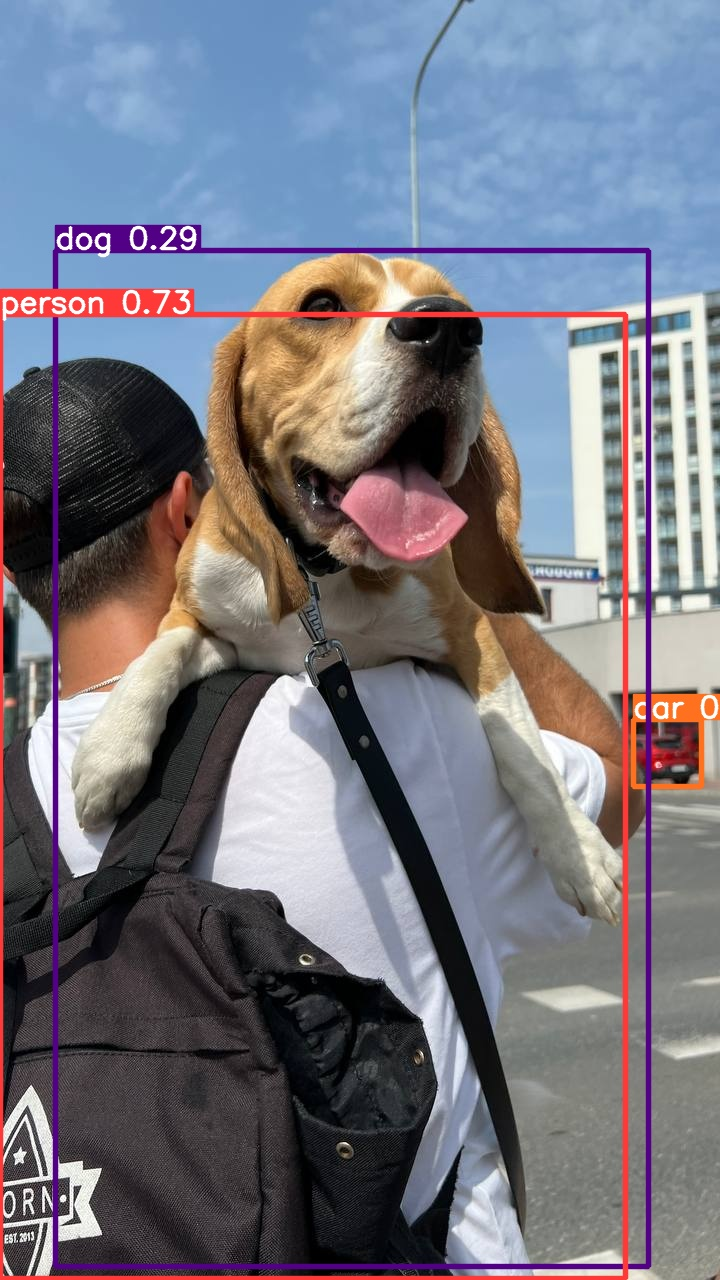

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 114.3ms
Speed: 3.2ms preprocess, 114.3ms inference, 533.1ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets



!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="elcDAA1459u6zcrABHG5")
project = rf.workspace("utilitypole97").project("680_add_data_hat66_glasses100")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully unin

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to 680_add_data_hat66_glasses100-1 in yolov8:: 100%|██████████| 1855/1855 [00:00<00:00, 5809.37it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={datasets.location}/data.yaml epochs=25 imgsz=800 plots=True yolo train --data /content/datasets/680_add_data_hat66_glasses100-1/data.yaml


/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 382, in entrypoint
    check_dict_alignment(full_args_dict, {a: ''})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 203, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'yolo' is not a valid YOLO argument. 

    Arguments received: ['yolo', 'task=detect', 'mode=train', 'model=yolov8s.pt', 'data={datasets.location}/data.yaml', 'epochs=25', 'imgsz=800', 'plots=True', 'yolo', 'train', '--data', '/content/datasets/680_add_data_hat66_glasses100-1/data.yaml']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'be

## Training

In [ ]:
%cd {HOME}
!yolo train data=/content/datasets/680_add_data_hat66_glasses100-1/data.yaml


/content
WARNING ⚠️ 'model' is missing. Using default 'model=yolov8n.pt'.
New https://pypi.org/project/ultralytics/8.1.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/680_add_data_hat66_glasses100-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

In [ ]:
!ls {HOME}/runs/detect/train4/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch5130.jpg
confusion_matrix.png				    R_curve.png       train_batch5131.jpg
events.out.tfevents.1711938764.005abe550811.3880.0  results.csv       train_batch5132.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


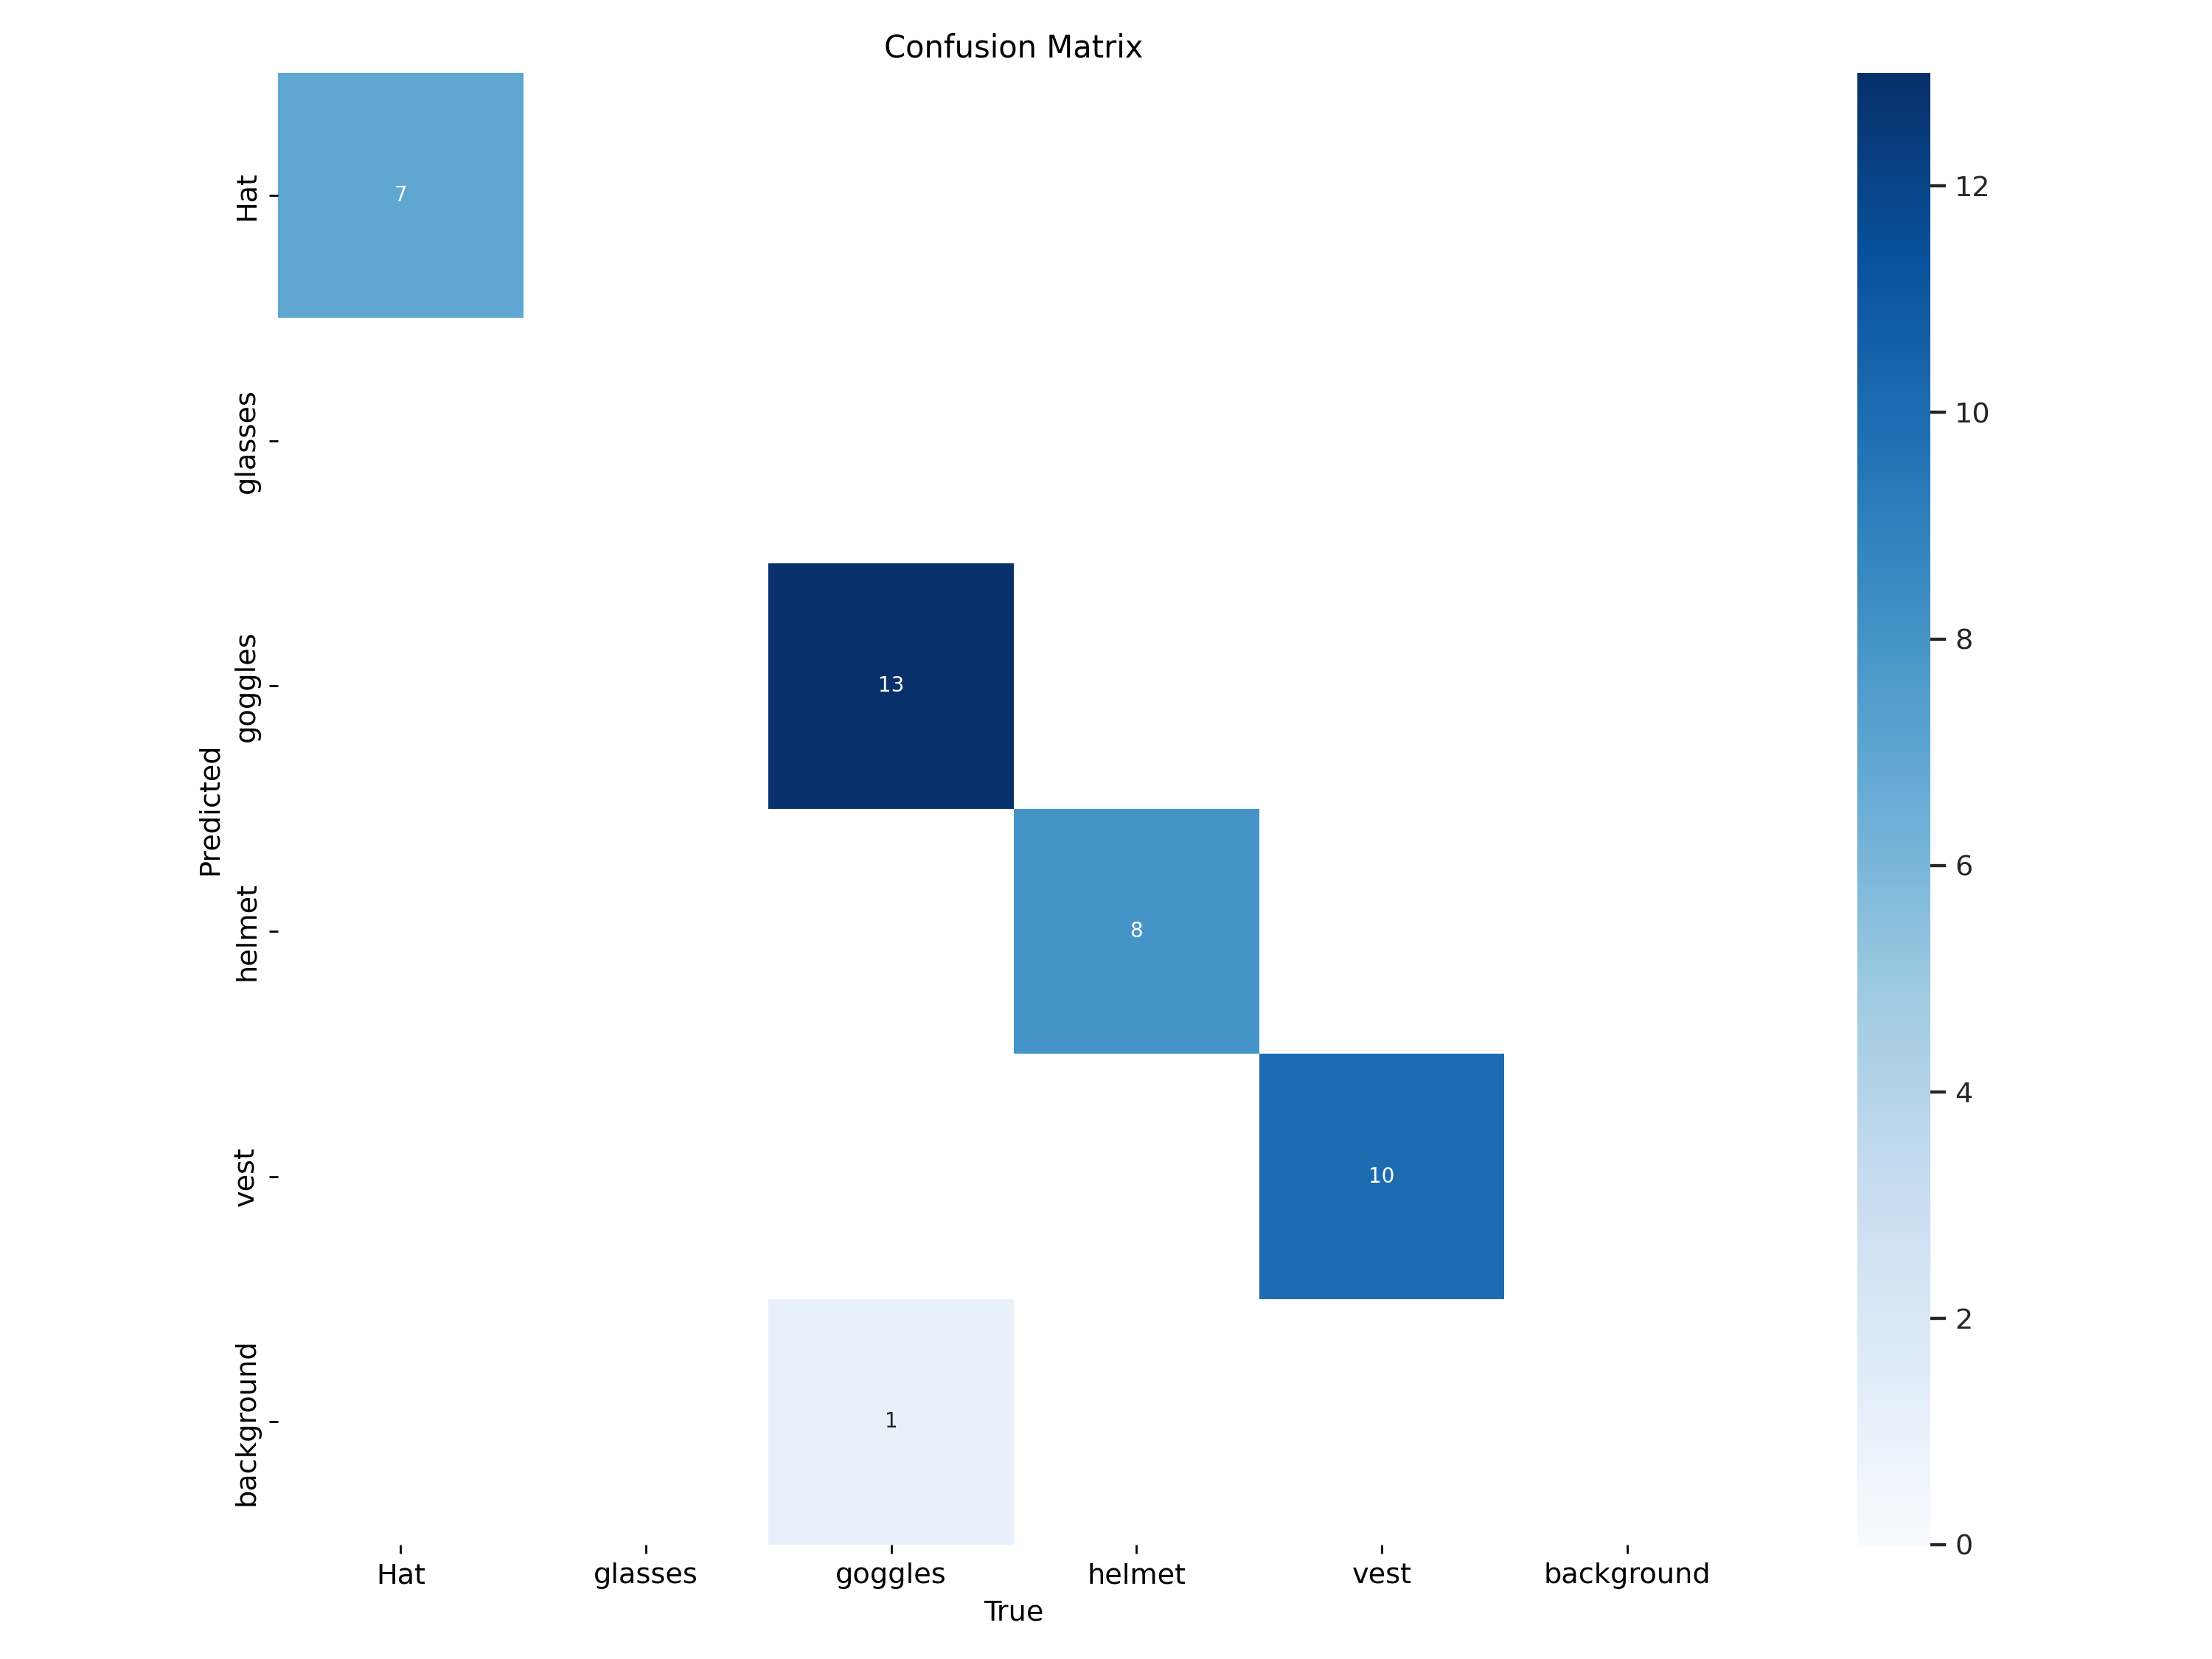

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

/content


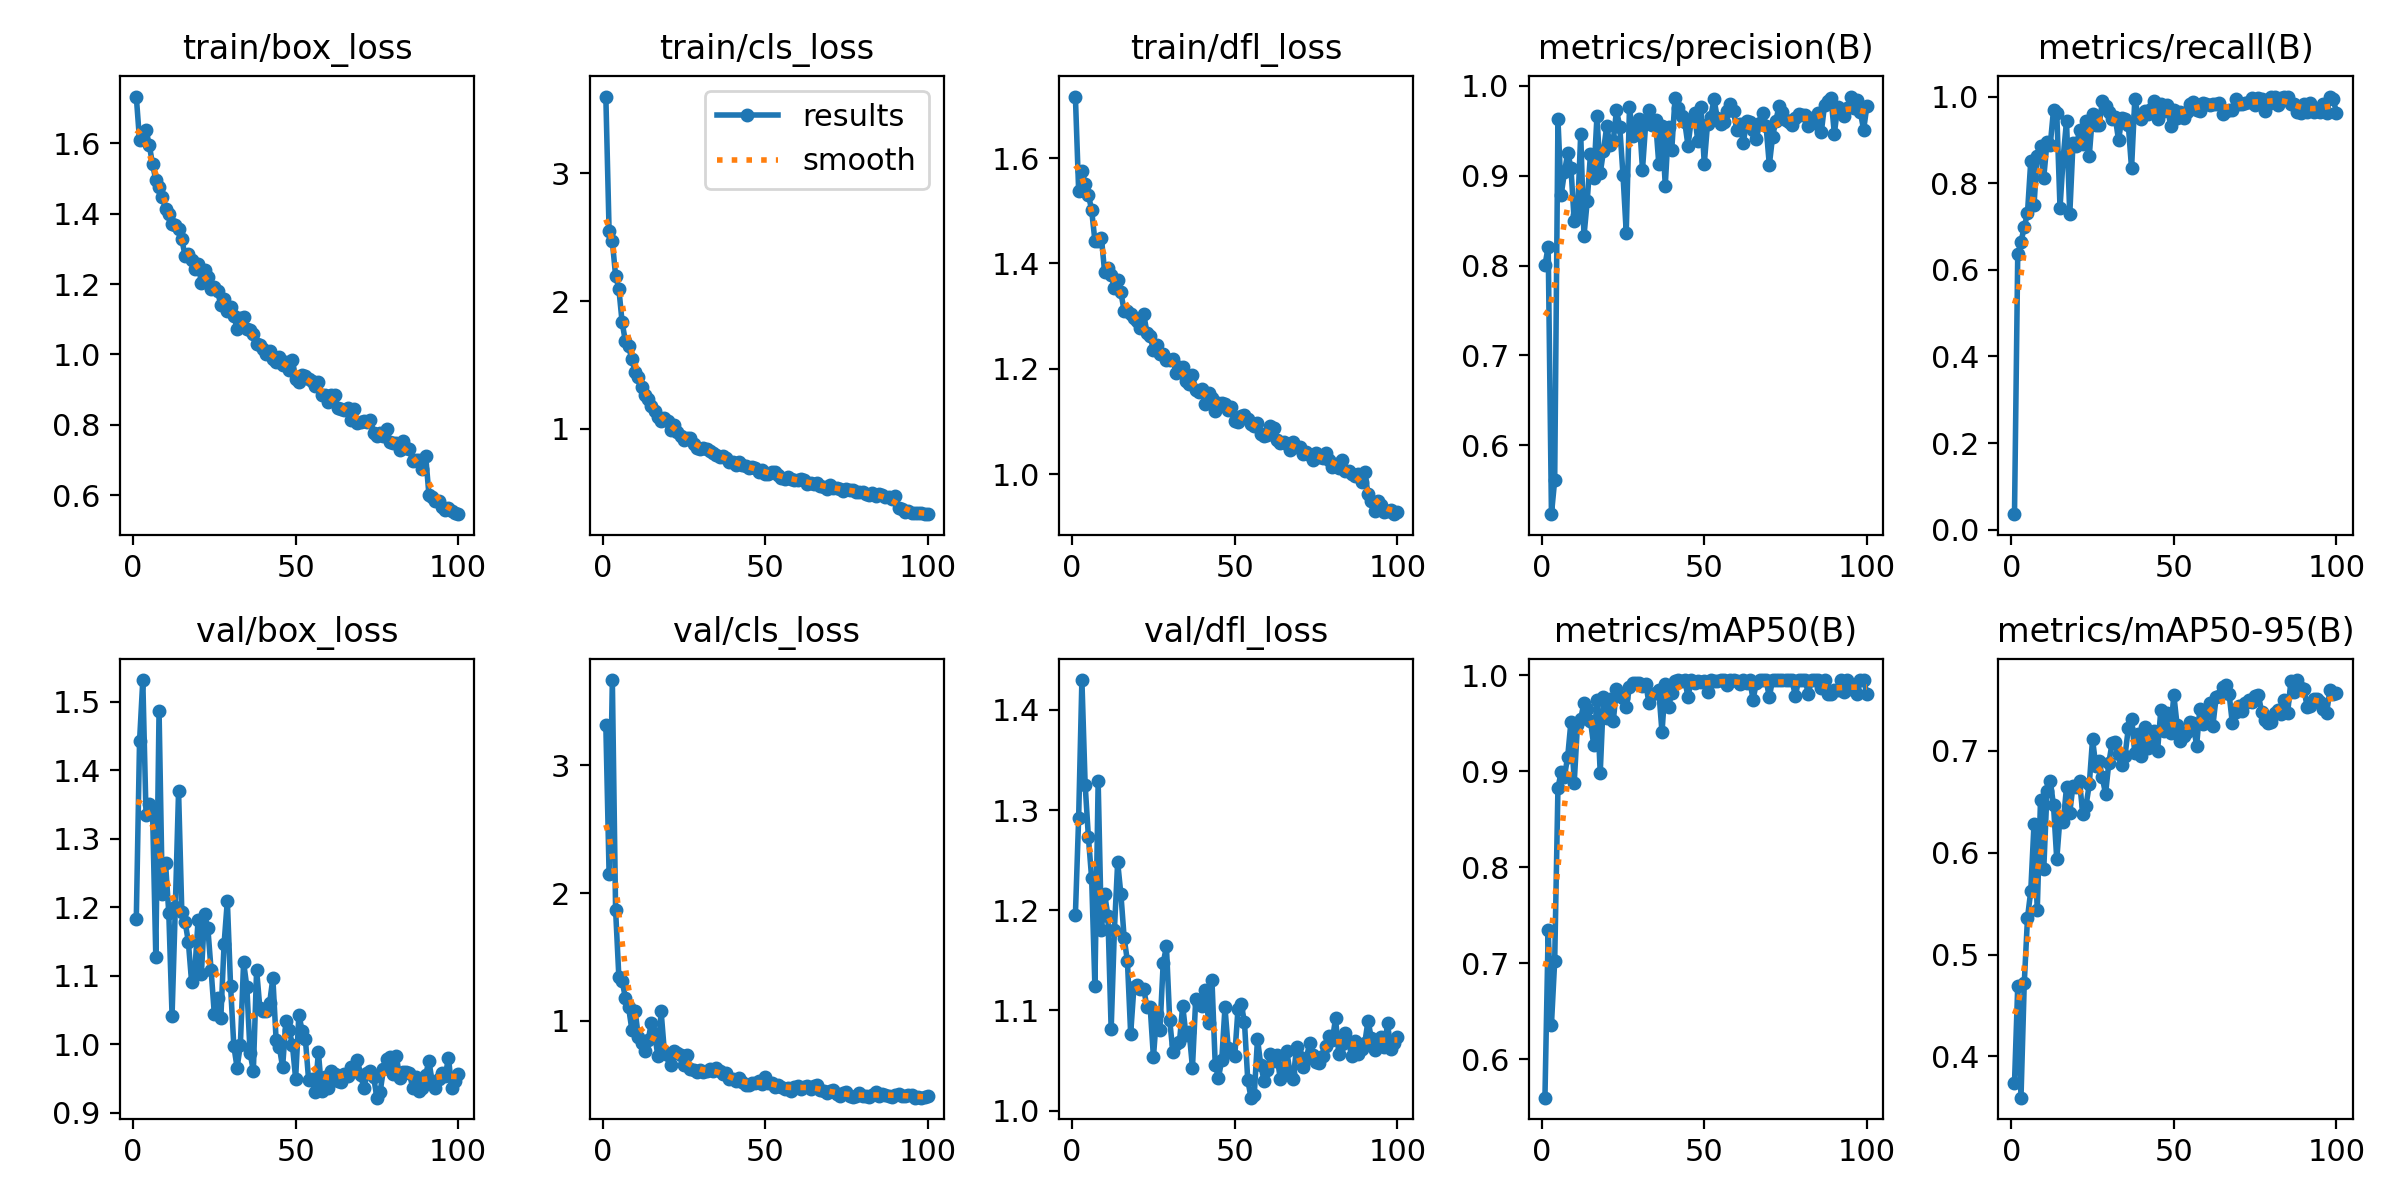

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

**The trends of the loss values are gradually decreasing, which indicates that the model is learning. Additionally, the evaluation metric values improve over the training time.**

/content


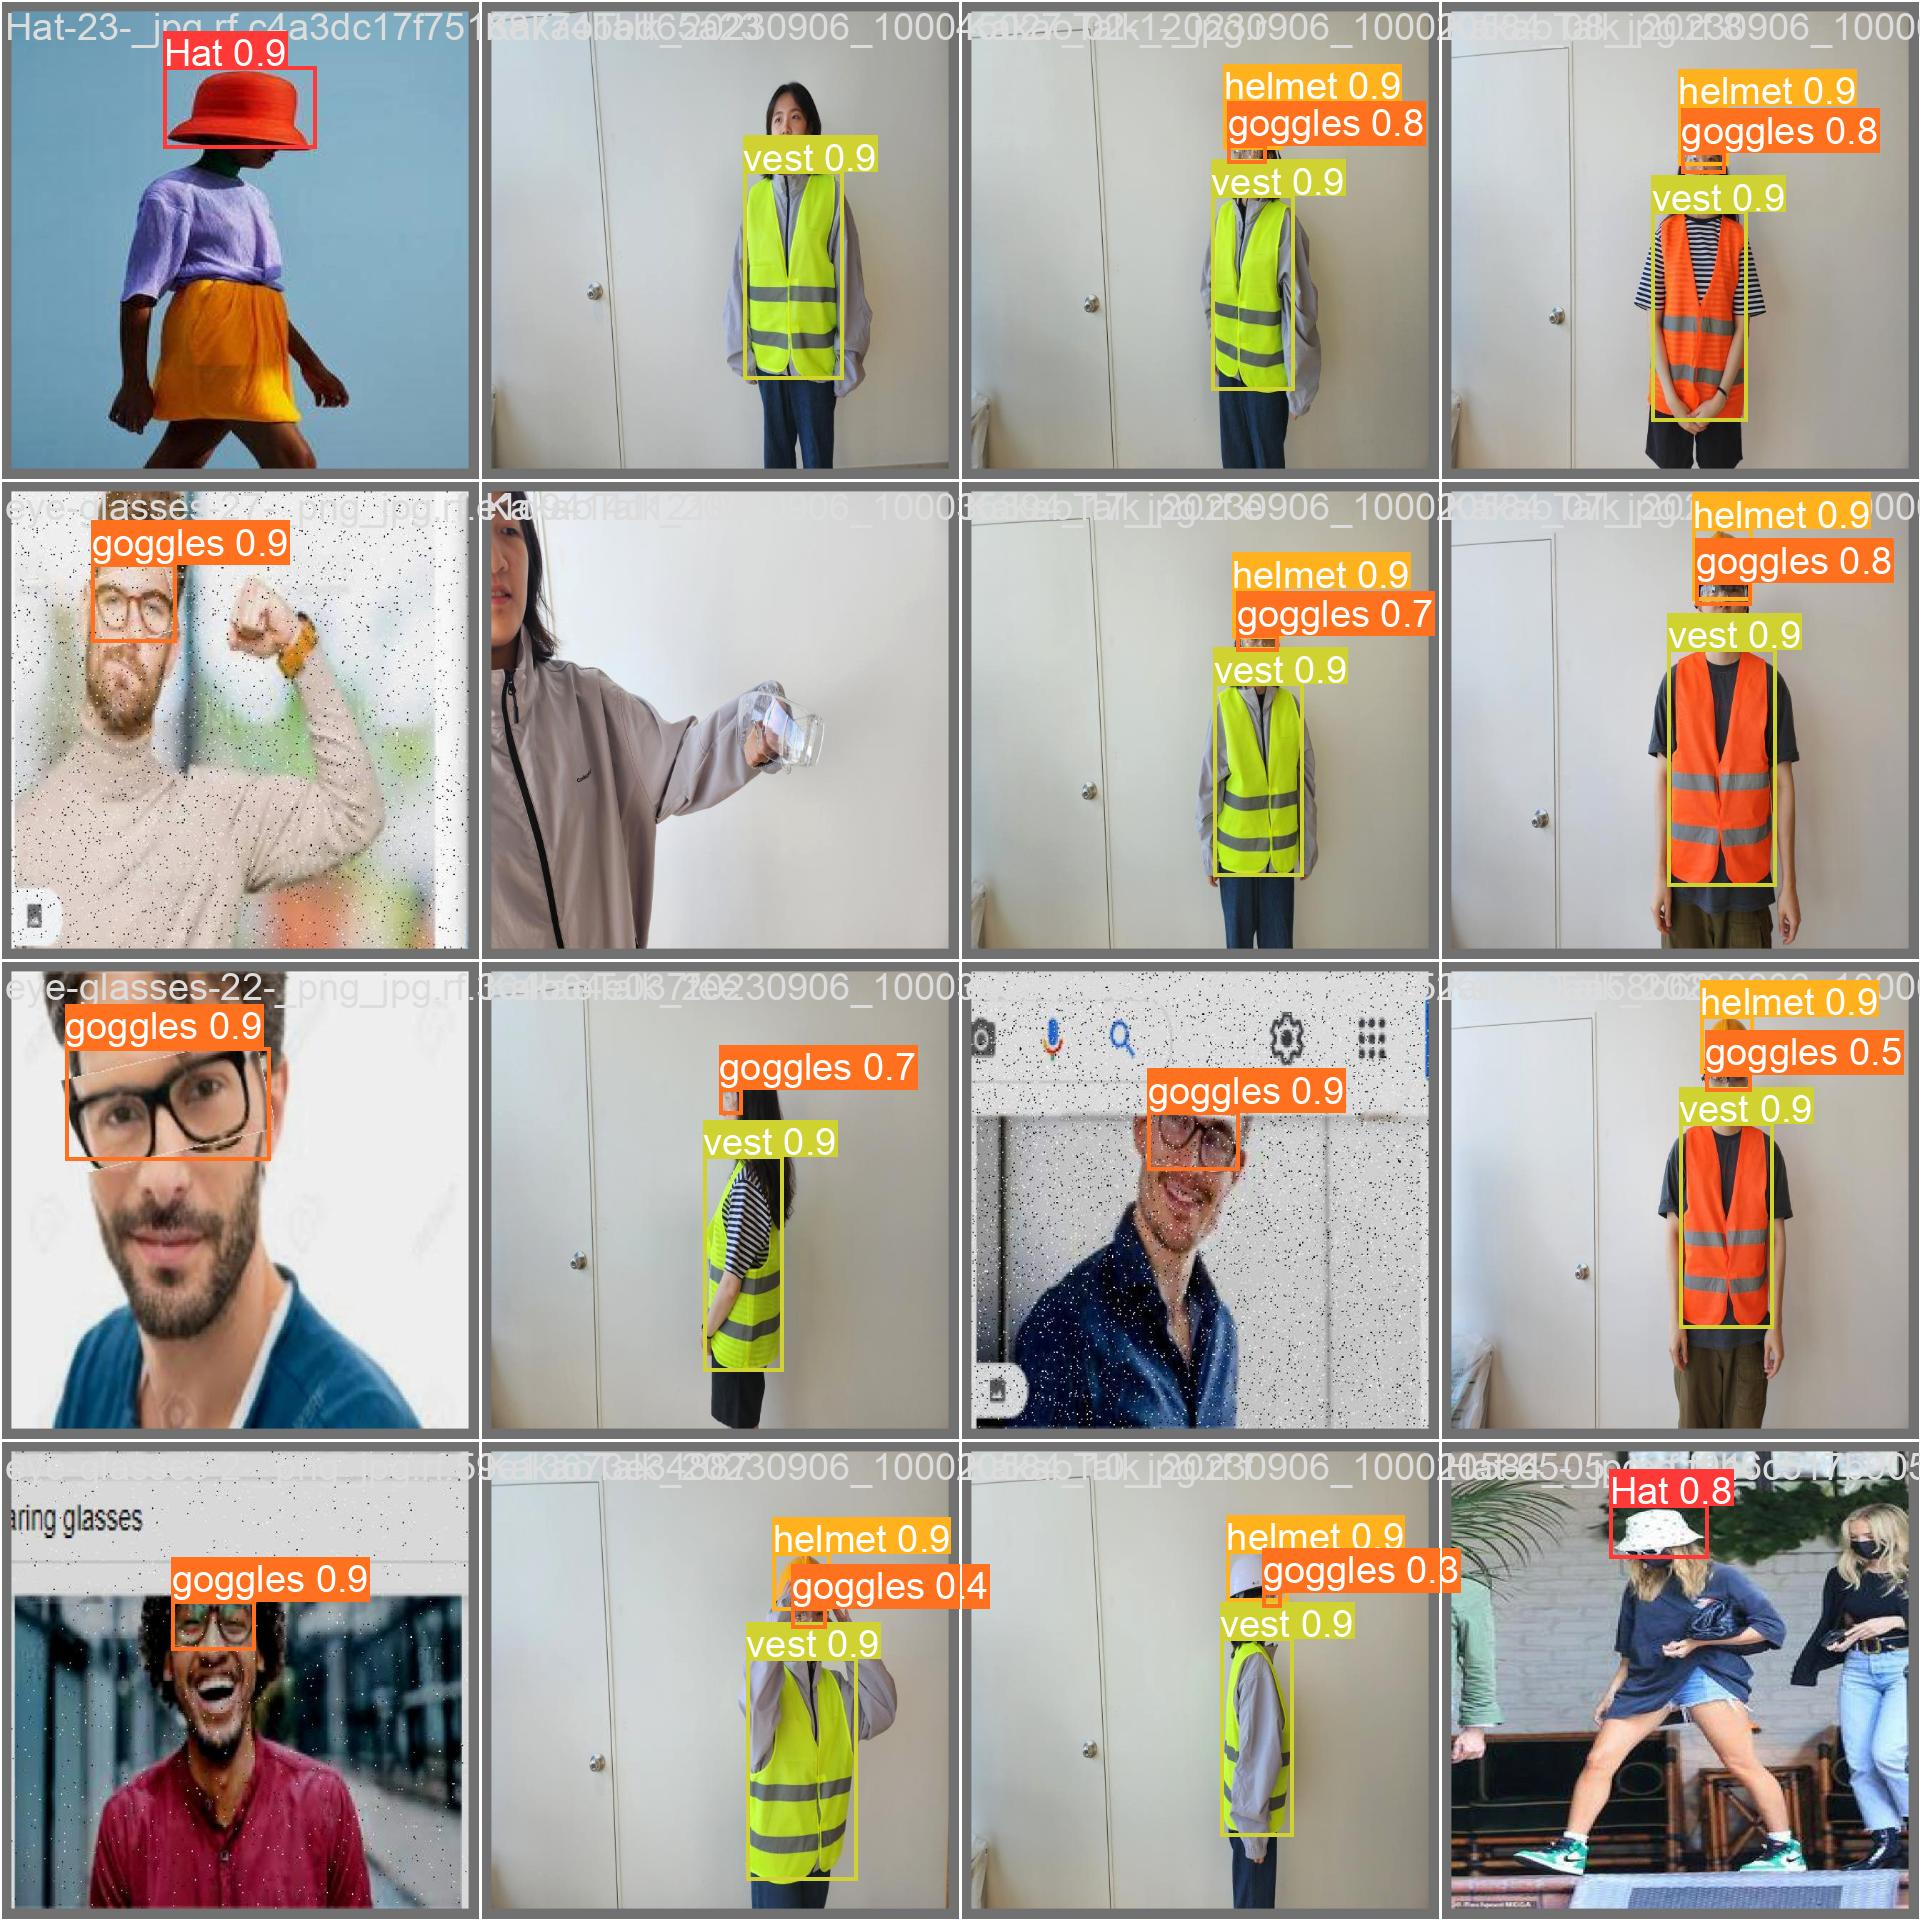

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

**We can see that the model accurately detects the object in the image.**

## Validate Custom Model

In [ ]:
#%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data=/content/datasets/680_add_data_hat66_glasses100-1/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/680_add_data_hat66_glasses100-1/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.14it/s]
                   all         23         39      0.983      0.964      0.981      0.765
                   Hat         23          7      0.939          1      0.995      0.766
               goggles         23         14      0.993      0.857      0.938       0.64
                helmet         23          8          1          1      0.995      0.768
                  vest         23         10          1          1      0.995      0.888
Speed: 0.2ms preprocess, 22.0ms inference, 0.0ms loss, 25.0ms postprocess per image
Results saved to runs/detect/

## Ineference with Custom Model

In [ ]:
#%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.25 source=/content/datasets/680_add_data_hat66_glasses100-1/valid/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/23 /content/datasets/680_add_data_hat66_glasses100-1/valid/images/Hat-23-_jpg.rf.c4a3dc17f75188774bbd65a238c44fab.jpg: 640x640 1 Hat, 11.1ms
image 2/23 /content/datasets/680_add_data_hat66_glasses100-1/valid/images/Hat-3-_jpg.rf.58d275f6428ebb8ae61731f5af1aae04.jpg: 640x640 1 Hat, 7.4ms
image 3/23 /content/datasets/680_add_data_hat66_glasses100-1/valid/images/Hat-41-_jpg.rf.0c8e60eb99eadd0f1c3f5c8d02028965.jpg: 640x640 1 Hat, 7.3ms
image 4/23 /content/datasets/680_add_data_hat66_glasses100-1/valid/images/Hat-48-_jpg.rf.11b7bed084a66236b2e988a8f312c9cd.jpg: 640x640 1 Hat, 7.3ms
image 5/23 /content/datasets/680_add_data_hat66_glasses100-1/valid/images/Hat-64-_jpg.rf.3deb1ee9db1b993c2b50d35e181cbce3.jpg: 640x640 1 Hat, 7.3ms
image 6/23 /content/datasets/680_add_data_hat66_gl

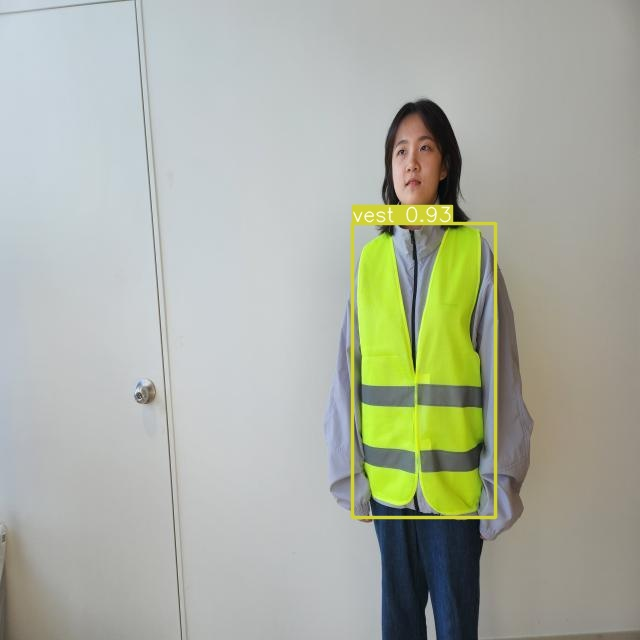

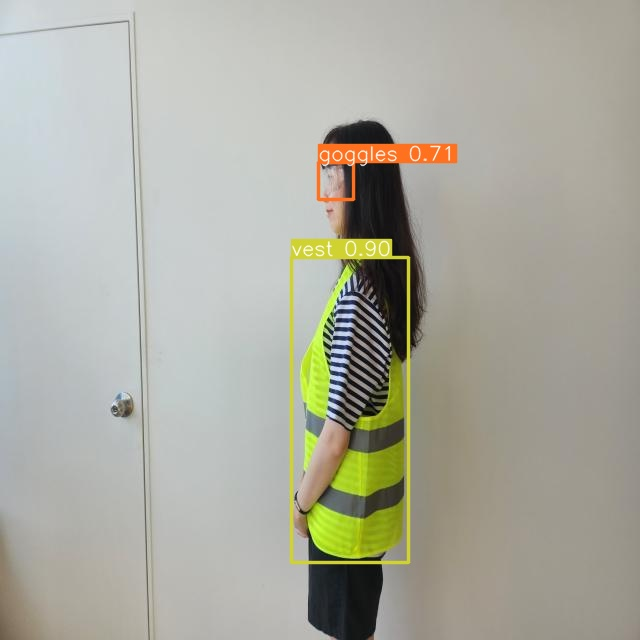

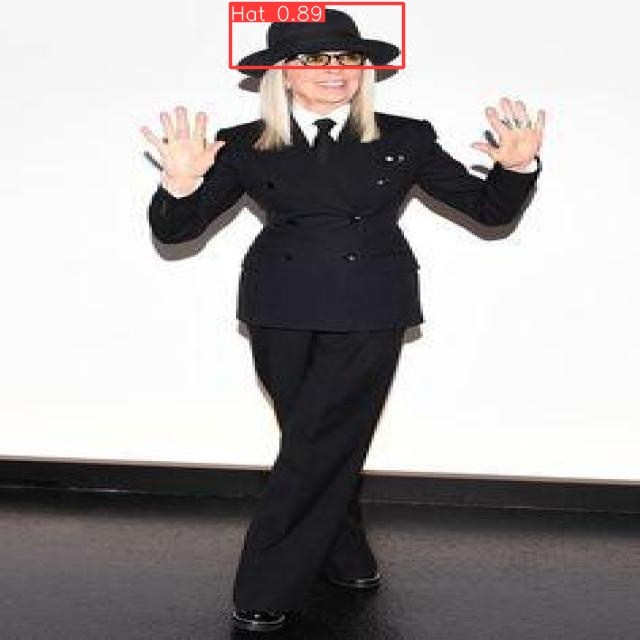

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Conclusion

**I encountered numerous errors when using YOLOv3 because it is outdated and no longer compatible with the software we are currently using. This activity has been stressful, but also enjoyable because it allows me to explore, such as finding solutions to the errors I encountered. My first error was with the library versions, so I searched online for solutions and asked my friends for help. The most stressful part was when I got disconnected by Google during training because I reached the maximum duration. I attempted to lower the epoch, and the first part of training went smoothly, but it failed to continue to the second part. So, I tried hypertuning the batch size, and the second part of training progressed, but I still encountered an Out Of Memory (OOM) error. After trying numerous solution, I still not successfully implemented the object detection. Therefore, I decided to use a newer version, which is YOLOv8 and I  was able to implement object detection without any problems.**